# KKbox churn prediction EDA & Memory Reduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
import datetime
%matplotlib inline

In [2]:
members = pd.read_csv('/Users/dineshviswatejagurram/Desktop/members_v3.csv') 

In [3]:
transactions_1 = pd.read_csv('/Users/dineshviswatejagurram/Desktop/transactions.csv') 

In [4]:
transactions_2 = pd.read_csv('/Users/dineshviswatejagurram/Desktop/transactions_v2.csv') 

In [5]:
transactions = transactions_1.append(transactions_2)

In [6]:
user_logs = pd.read_csv('/Users/dineshviswatejagurram/Desktop/user_logs_v2.csv')

In [7]:
train = pd.read_csv('/Users/dineshviswatejagurram/Desktop/train_v2.csv')

# Checking each file's memory usage

In [8]:
print(members.memory_usage().sum()/1023**2,"MB")

310.488083942251 MB


In [9]:
print(transactions.memory_usage().sum()/1023**2,"MB")

1756.5690009545842 MB


In [10]:
print(user_logs.memory_usage().sum()/1023**2,"MB")

1265.6487722748248 MB


In [11]:
print(train.memory_usage().sum()/1023**2,"MB")

14.844729577489014 MB


# Members data set

In [12]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
msno                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


In [13]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


Since 'registration_init_time' and 'expiration_date' columns are not datetime type. First, we will split them based on year, month, and date in order to convert it to more convinent type for us in the later data analysis.

In [14]:
members['registration_init_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[:4]))
members['registration_init_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_init_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[-2:]))

In [15]:
members['registration_init_year'] = members['registration_init_year'].astype(np.int16)
members['registration_init_month'] = members['registration_init_month'].astype(np.int8)
members['registration_init_date'] = members['registration_init_date'].astype(np.int8)

In [16]:
members['city'] = members['city'].astype(np.int8)
members['bd'] = members['bd'].astype(np.int16)
members['registered_via'] = members['registered_via'].astype(np.int8)
members['registration_init_year'] = members['registration_init_year'].astype(np.int16)
members['registration_init_month'] = members['registration_init_month'].astype(np.int8)
members['registration_init_date'] = members['registration_init_date'].astype(np.int8)

In [17]:
members = members.drop('registration_init_time', 1)

In [18]:
print(members.memory_usage().sum()/1023**2,"MB")

155.24408019271326 MB


In [19]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_year,registration_init_month,registration_init_date
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,2011,9,11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011,9,14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,2011,9,15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,2011,9,15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,2011,9,15


Members file memory usage reduced from 310 MB to 155 MB

# Transactions data set

In [20]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22978755 entries, 0 to 1431008
Data columns (total 9 columns):
msno                      object
payment_method_id         int64
payment_plan_days         int64
plan_list_price           int64
actual_amount_paid        int64
is_auto_renew             int64
transaction_date          int64
membership_expire_date    int64
is_cancel                 int64
dtypes: int64(8), object(1)
memory usage: 1.7+ GB


In [21]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0


In [22]:
transactions['payment_method_id'] = transactions['payment_method_id'].astype(np.int8)
transactions['payment_plan_days'] = transactions['payment_plan_days'].astype(np.int16)
transactions['plan_list_price'] = transactions['plan_list_price'].astype(np.int16)
transactions['actual_amount_paid'] = transactions['actual_amount_paid'].astype(np.int16)
transactions['is_auto_renew'] = transactions['is_auto_renew'].astype(np.int8)
transactions['is_cancel'] = transactions['is_cancel'].astype(np.int8)

In [23]:
transactions['transaction_date_year'] = transactions['transaction_date'].apply(lambda x: int(str(x)[:4]))
transactions['transaction_date_month'] = transactions['transaction_date'].apply(lambda x: int(str(x)[4:6]))
transactions['transaction_date_date'] = transactions['transaction_date'].apply(lambda x: int(str(x)[-2:]))

transactions['membership_expire_date_year'] = transactions['membership_expire_date'].apply(lambda x: int(str(x)[:4]))
transactions['membership_expire_date_month'] = transactions['membership_expire_date'].apply(lambda x: int(str(x)[4:6]))
transactions['membership_expire_date_date'] = transactions['membership_expire_date'].apply(lambda x: int(str(x)[-2:]))

In [24]:
transactions['transaction_date_year'] = transactions['transaction_date_year'].astype(np.int16)
transactions['transaction_date_month'] = transactions['transaction_date_month'].astype(np.int8)
transactions['transaction_date_date'] = transactions['transaction_date_date'].astype(np.int8)

transactions['membership_expire_date_year'] = transactions['membership_expire_date_year'].astype(np.int16)
transactions['membership_expire_date_month'] = transactions['membership_expire_date_month'].astype(np.int8)
transactions['membership_expire_date_date'] = transactions['membership_expire_date_date'].astype(np.int8)

In [25]:
transactions = transactions.drop('transaction_date', 1)
transactions = transactions.drop('membership_expire_date', 1)

In [26]:
print(transactions.memory_usage(index=True).sum()/ 1024**2," MB")

723.1701993942261  MB


In [27]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,transaction_date_year,transaction_date_month,transaction_date_date,membership_expire_date_year,membership_expire_date_month,membership_expire_date_date
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,0,2015,9,30,2015,11,1
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,0,2015,9,30,2015,10,31
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,0,2015,9,30,2016,4,27
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,0,2015,9,30,2015,11,28
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,0,2015,9,30,2015,11,21


transactions file memory usage reduced from 1756 MB to 723 MB

# User logs dataset

In [28]:
user_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396362 entries, 0 to 18396361
Data columns (total 9 columns):
msno          object
date          int64
num_25        int64
num_50        int64
num_75        int64
num_985       int64
num_100       int64
num_unq       int64
total_secs    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 1.2+ GB


In [29]:
user_logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [30]:
user_logs['date_year'] = user_logs['date'].apply(lambda x: int(str(x)[:4]))
user_logs['date_month'] = user_logs['date'].apply(lambda x: int(str(x)[4:6]))
user_logs['date_date'] = user_logs['date'].apply(lambda x: int(str(x)[-2:]))

In [31]:
user_logs['date_year'] = user_logs['date_year'].astype(np.int16)
user_logs['date_month'] = user_logs['date_month'].astype(np.int8)
user_logs['date_date'] = user_logs['date_date'].astype(np.int8)

In [32]:
user_logs['num_25'] = user_logs['num_25'].astype(np.int16)
user_logs['num_50'] = user_logs['num_50'].astype(np.int16)
user_logs['num_75'] = user_logs['num_75'].astype(np.int16)
user_logs['num_985'] = user_logs['num_985'].astype(np.int16)
user_logs['num_100'] = user_logs['num_100'].astype(np.int32)
user_logs['num_unq'] = user_logs['num_unq'].astype(np.int16)

In [33]:
user_logs = user_logs.drop('date', 1)

In [34]:
print(user_logs.memory_usage().sum()/1023**2,"MB")

597.6675161414543 MB


In [35]:
user_logs.head()

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,date_year,date_month,date_date
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,8,4,0,1,21,18,6309.273,2017,3,31
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,2,2,1,0,9,11,2390.699,2017,3,30
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,52,3,5,3,84,110,23203.337,2017,3,31
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,176,4,2,2,19,191,7100.454,2017,3,31
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,2,1,0,1,112,93,28401.558,2017,3,31


user logs file memory usage reduced from 1265 MB to 596 MB

# Train dataset

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
msno        970960 non-null object
is_churn    970960 non-null int64
dtypes: int64(1), object(1)
memory usage: 14.8+ MB


In [37]:
train['is_churn'] = train['is_churn'].astype(np.int8)

In [38]:
print(train.memory_usage().sum()/1023**2,"MB")

8.350193831226846 MB


train file memory usage reduced from 14 MB to 8 MB

# Churn Percentage

Churn Percentage: 8.994191315811156


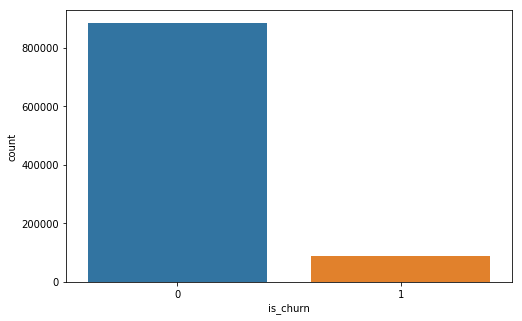

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(x="is_churn", data=train)
print('Churn Percentage: ' + str(87330/970960 * 100))

Only 9% people have churned which looks so successful, making it a highly imbalanced classification problem.

# Data Exploration in x1 (merged data set of train and members)

In [40]:
x1 = pd.merge(train,members, on='msno', how='left')

In [41]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 9 columns):
msno                       970960 non-null object
is_churn                   970960 non-null int8
city                       860967 non-null float64
bd                         860967 non-null float64
gender                     388905 non-null object
registered_via             860967 non-null float64
registration_init_year     860967 non-null float64
registration_init_month    860967 non-null float64
registration_init_date     860967 non-null float64
dtypes: float64(6), int8(1), object(2)
memory usage: 67.6+ MB


Because not all users are present in the members data set, we are seeing some null values in x1.

# which city are the users coming from? (members)

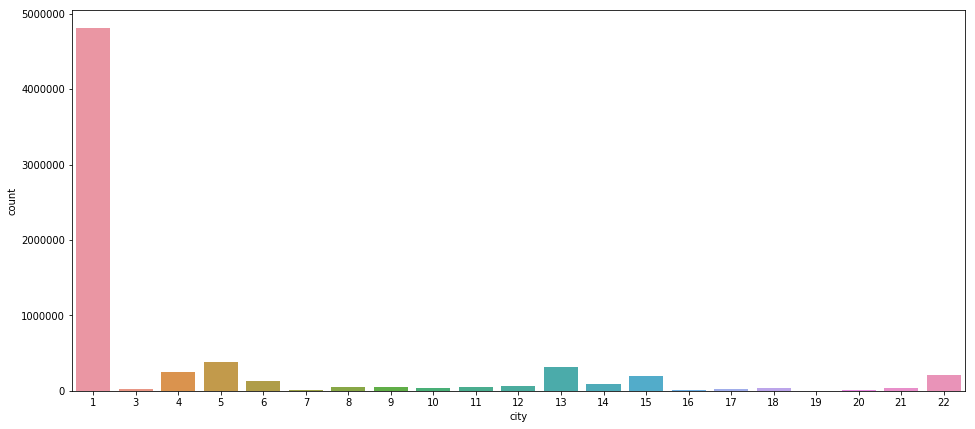

In [42]:
plt.figure(figsize=(16,7))
sns.countplot(x="city", data=members)
plt.show()

There are total of 21 cities, there is no city '2'. We observe majority from city 1. Everything else looks similarly unpopular.

# Which city users are churning most? (x1)

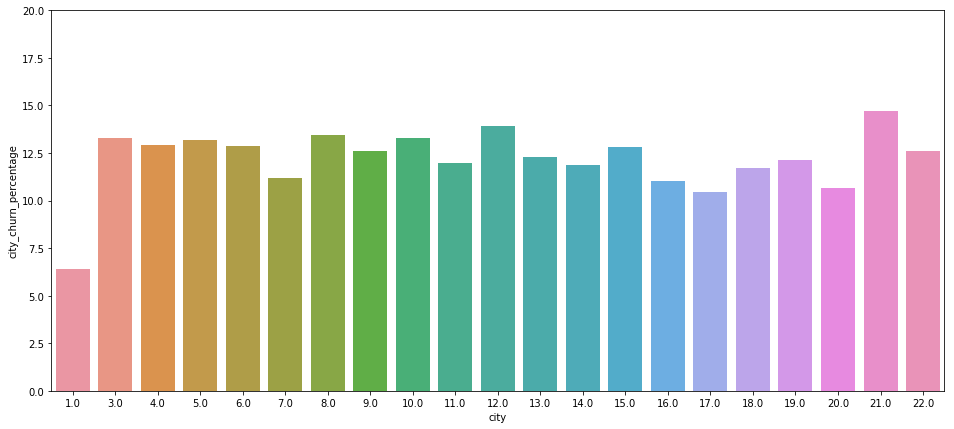

In [43]:
plt.figure(figsize=(16,7))
a = x1.groupby(['city','is_churn'])['msno'].count().reset_index()
a = pd.pivot_table(a, values='msno', index='city',columns='is_churn')
a['city_churn_percentage'] = (a[1]/(a[0] + a[1]))*100
a = a.reset_index()
sns.barplot(x = 'city', y = 'city_churn_percentage',data = a)
plt.ylim(0, 20)
plt.show()

The cities are quite similar at churn rates with the crucial exception of city “1”. In this most popular city (see above) the churn rate is significantly lower when compared to other cities. This has a big impact on the overall churn rate.

# How is the users age distributed? (members)

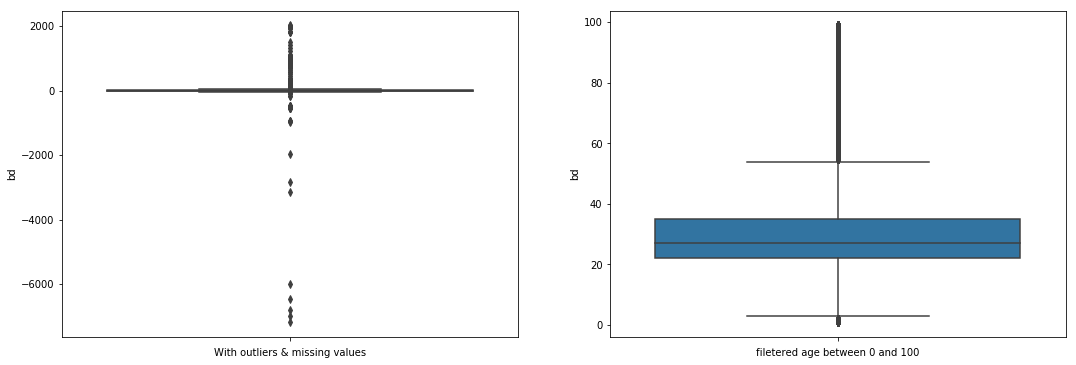

In [44]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.boxplot(y = members.bd, data = members)
plt.xlabel('With outliers & missing values')
plt.subplot(1,2,2)
filtered_bd =members.bd[(members.bd > 0 )& (members.bd < 100)] 
sns.boxplot(y = filtered_bd, data = members)
plt.xlabel('filetered age between 0 and 100')
plt.show()

Here in the bd (Age) column we observed it has lot of values set to 0 and there are some outliers.

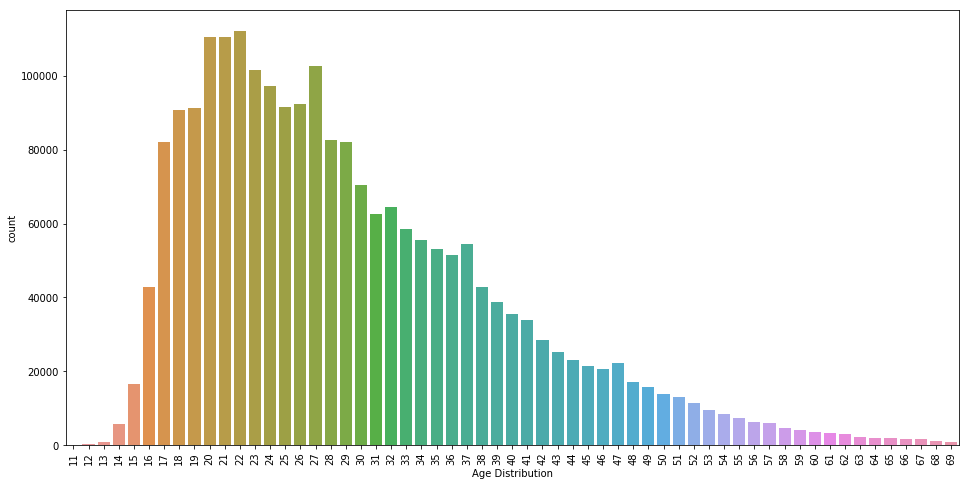

In [45]:
plt.figure(figsize = (16,8))
filtered_bd =members.bd[(members.bd > 10 )& (members.bd < 70)] 
sns.countplot(filtered_bd)
plt.xticks(rotation = 90)
plt.xlabel('Age Distribution')
plt.show()

Here we filtered the bd (Age) column between 10 and 70 and from the above distribution we can clearly see that most of the customers are aged betweem mid teen's to mid 40's.

# Which age group users are churning most? (x1)

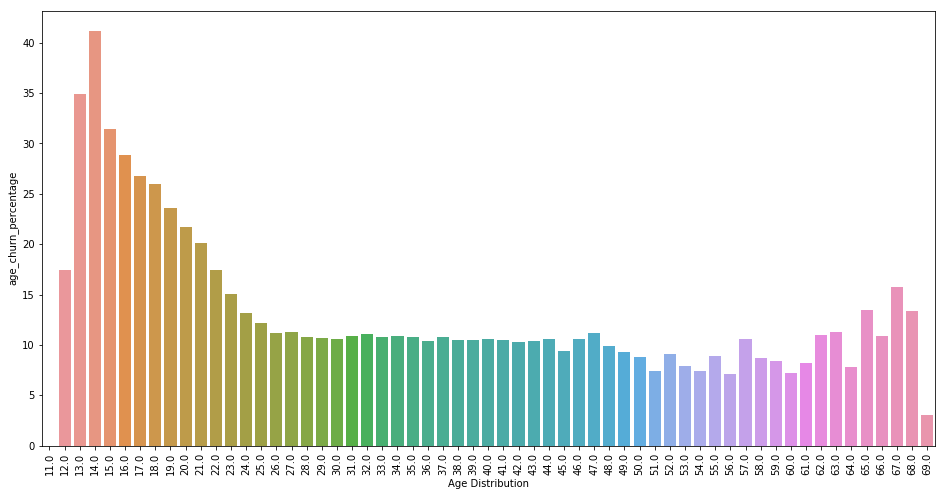

In [46]:
plt.figure(figsize = (16,8))
filtered_bd_x1 =x1[(x1.bd > 10 )& (x1.bd < 70)] 

b = filtered_bd_x1.groupby(['bd','is_churn'])['msno'].count().reset_index()
b = pd.pivot_table(b, values='msno', index='bd',columns=['is_churn'], aggfunc=np.sum)
b['age_churn_percentage'] = (b[1]/(b[0] + b[1]))*100
b = b.reset_index()
sns.barplot(x = 'bd', y = 'age_churn_percentage',data = b)
plt.xticks(rotation = 90)
plt.xlabel('Age Distribution')
plt.show()

Here we are only visualizing the churn rates of users between 10 and 70 and we find that younger users on average appear to be more likely to churn.



# Male Vs Female. 
# Who is registering more ? Who is churning more ? (members & x1)

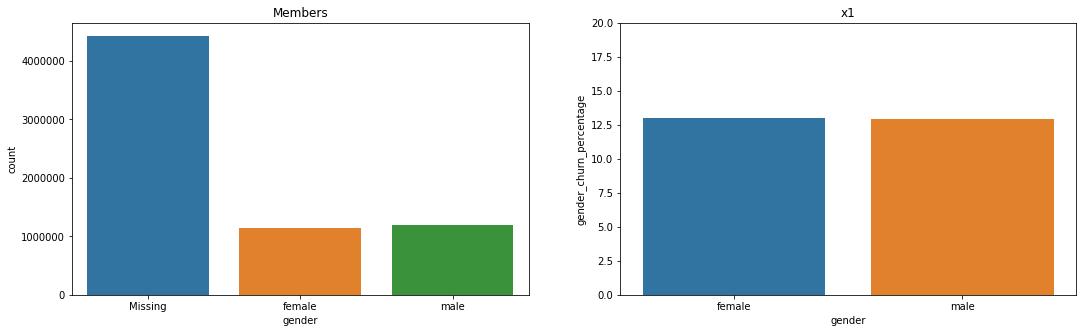

In [47]:
members['gender'] = members['gender'].fillna('Missing')
plt.figure(figsize=(18,5))
plt.subplot(121)
sns.countplot(x="gender", data=members)
#plt.xticks(np.arange(3), ("Male", "Missing","Female"))
plt.title('Members')

plt.subplot(122)
c = x1.groupby(['gender', 'is_churn'])['msno'].count().reset_index()
c = pd.pivot_table(c, index = 'gender', columns = 'is_churn', values = 'msno', aggfunc= np.sum)
c['gender_churn_percentage'] = (c[1]/ (c[0] + c[1])) * 100
c = c.reset_index()
sns.barplot(x = 'gender', y = 'gender_churn_percentage', data = c)
plt.title('x1')
plt.ylim(0, 20)
plt.show()

Around 60% of the data is missing after the merge. With the data we have it seems both male and female are churning quite similar. We have to see how to deal with the missing values in future analysis.

# How are the users registered and their churning trends based on their registeration type? (members & x1)

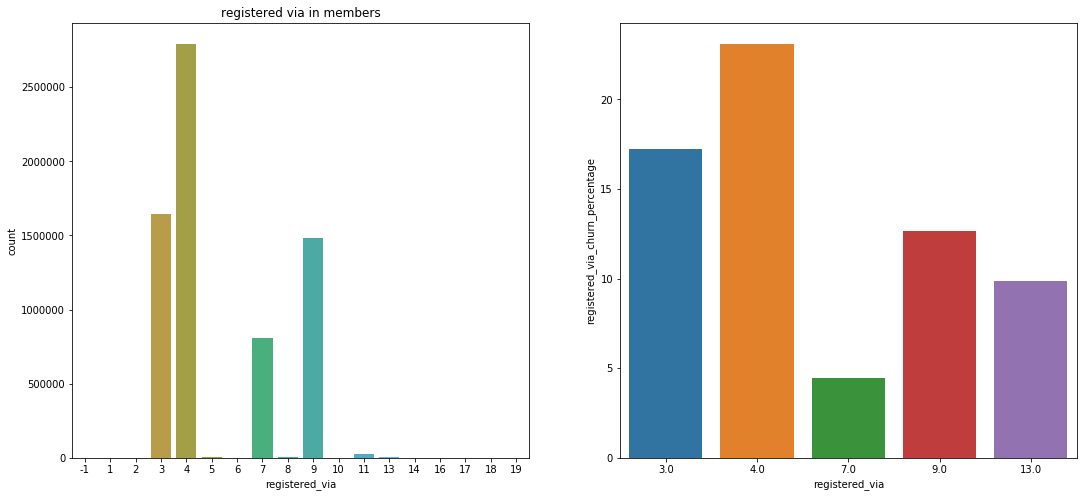

In [48]:
plt.figure(figsize=(18,8))
plt.subplot(121)
members['registered_via'] = members['registered_via'].fillna('Missing')
sns.countplot(x="registered_via", data=members)
plt.title('registered via in members')

plt.subplot(122)
d = x1.groupby(['registered_via', 'is_churn'])['msno'].count().reset_index()
d = pd.pivot_table(d, index = 'registered_via', columns = 'is_churn', values = 'msno', aggfunc = np.sum)
d['registered_via_churn_percentage'] = (d[1]/(d[1] + d[0])) * 100
d = d.reset_index()
sns.barplot(x = 'registered_via', y = 'registered_via_churn_percentage', data = d)
plt.show()

There are 5 classes('3', '4', '7', '9', '13') listed as registration method in x1. There are also some additional classes in the members dataset. As we merged the train and members they are missing. Also there are noticeable differences in terms of registration method. Method “7” appears to correlated with the most loyal users, while method “4” has slightly higher churn rate of all.

# How are the registration trends yearly & monthly? (members)

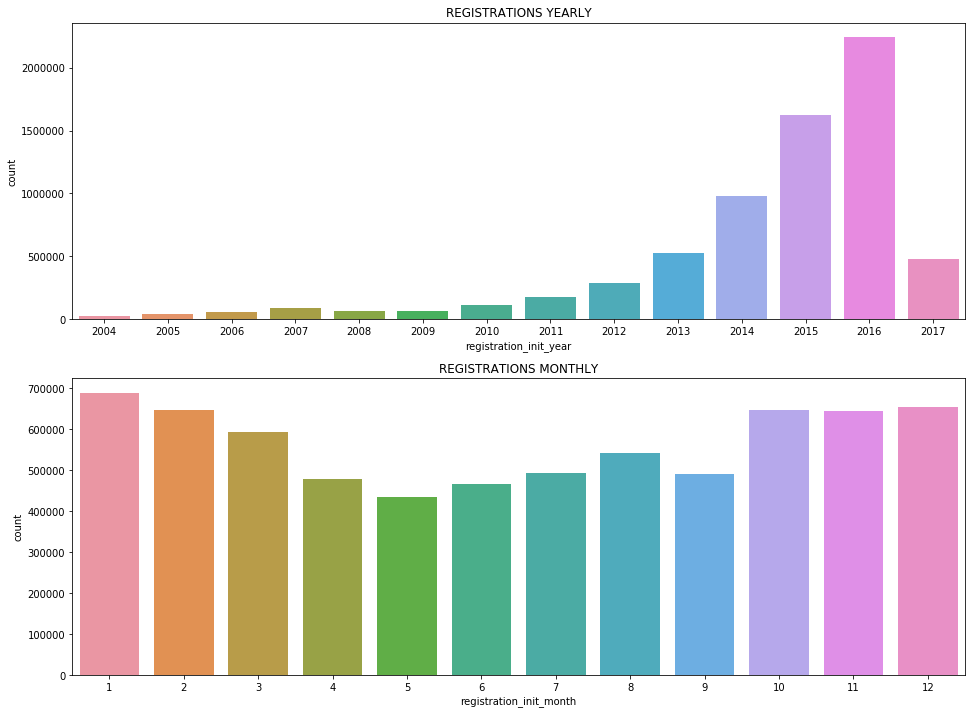

In [49]:
plt.figure(figsize=(16,12))
plt.subplot(211)
sns.countplot(x="registration_init_year", data=members)
plt.title('REGISTRATIONS YEARLY')

plt.subplot(212)
sns.countplot(x="registration_init_month", data=members)
plt.title('REGISTRATIONS MONTHLY')
plt.show()

Here we observe that popularity started rising slowly after 2009 and it started to increase strongly from 2012. Registrations are high during the year end(oct, nov, dec) and year starting months(jan, feb).

# How are the churning trends yearly and monthly? (x1)

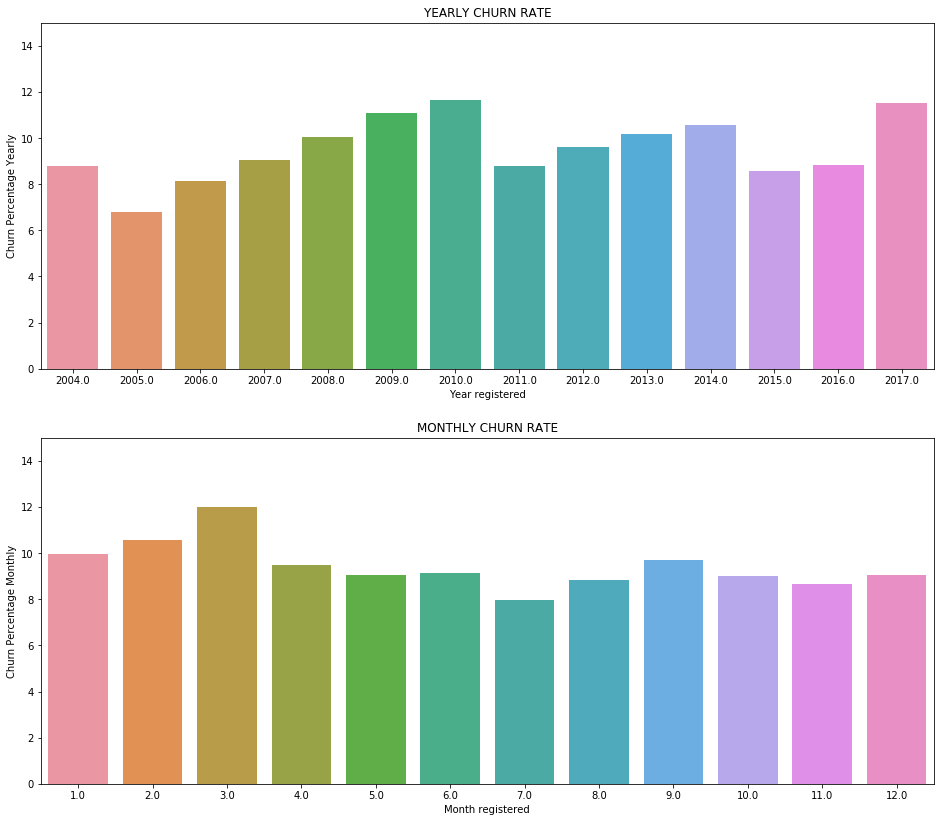

In [50]:
plt.figure(figsize=(16,14))

plt.subplot(211)
e = x1.groupby(['registration_init_year', 'is_churn'])['msno'].count().reset_index()
e = pd.pivot_table(e, index = 'registration_init_year', columns = 'is_churn', values = 'msno', aggfunc = np.sum)
e['churn_percentage_yearly'] = (e[1]/ (e[0] + e[1])) * 100
e = e.reset_index()
sns.barplot(x = 'registration_init_year', y = 'churn_percentage_yearly', data = e)
plt.ylim(0,15)
plt.xlabel('Year registered')
plt.ylabel('Churn Percentage Yearly')
plt.title('YEARLY CHURN RATE')

plt.subplot(212)
f = x1.groupby(['registration_init_month', 'is_churn'])['msno'].count().reset_index()
f = pd.pivot_table(f, index = 'registration_init_month', columns = 'is_churn', values = 'msno', aggfunc = np.sum)
f['churn_percentage_monthly'] = (f[1]/ (f[0] + f[1])) * 100
f = f.reset_index()
sns.barplot(x = 'registration_init_month', y = 'churn_percentage_monthly', data = f)
plt.ylim(0,15)
plt.xlabel('Month registered')
plt.ylabel('Churn Percentage Monthly')
plt.title('MONTHLY CHURN RATE')
plt.show()

The churn rate doesn't seem to follow a trend. It'|s been consistent and fluctuating between 8% to 12% regardless of increase in number of registrations every year.

# Data Exploration in x2 (merged data set of train and transactions)

In [51]:
x2 = pd.merge(train, transactions, on = 'msno', how = 'left')

In [52]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16255622 entries, 0 to 16255621
Data columns (total 14 columns):
msno                            object
is_churn                        int8
payment_method_id               int8
payment_plan_days               int16
plan_list_price                 int16
actual_amount_paid              int16
is_auto_renew                   int8
is_cancel                       int8
transaction_date_year           int16
transaction_date_month          int8
transaction_date_date           int8
membership_expire_date_year     int16
membership_expire_date_month    int8
membership_expire_date_date     int8
dtypes: int16(5), int8(8), object(1)
memory usage: 527.1+ MB


# Which Payment method-id is most used ? & Payment method-id vs CHURN (transactions & x2)

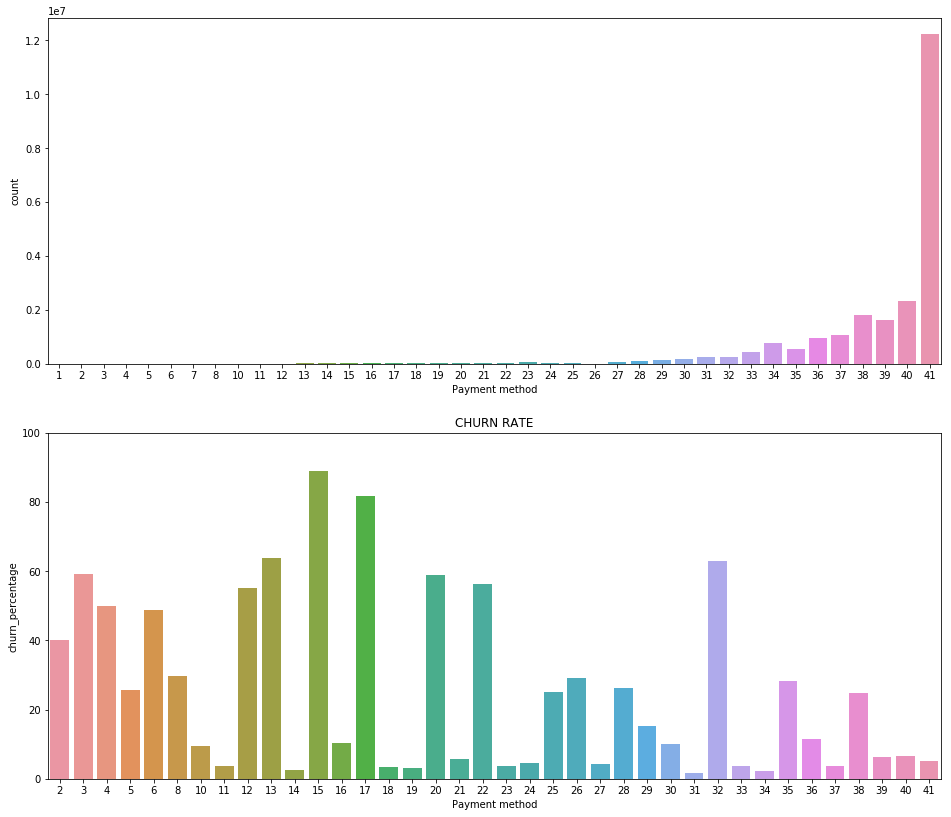

In [53]:
plt.figure(figsize=(16,14))
plt.subplot(211)
sns.countplot(x="payment_method_id", data=transactions)
plt.xlabel('Payment method')

plt.subplot(212)
df1 = x2.groupby(['payment_method_id', 'is_churn'])['msno'].count().reset_index()
df1 = pd.pivot_table(df1, index = 'payment_method_id', columns = 'is_churn', values = 'msno', aggfunc = np.sum)
df1['churn_percentage'] = (df1[1]/ (df1[0] + df1[1])) * 100
df1 = df1.reset_index()
sns.barplot(x = 'payment_method_id', y = 'churn_percentage', data = df1)
plt.title('CHURN RATE')
plt.xlabel('Payment method')
plt.ylim(0,100)
plt.show()

There are 40 payment methods (method '9' is missing) and the payment_method '41' is by far the most popular one. 

Some payment_methods are clearly associated to more loyal users than others. Note that several categories suffer from low-number statistics and the corresponding large churn rate bars. However, the vastly popular payment method “41” is easily in the top 10 of lowest churn.

# Which payment plan is mostly used? & Payment plan days Vs CHURN (transactions & x2)

payment_plan_days Count: [(30, 20174288), (0, 872342), (31, 766612), (7, 589807), (410, 162236), (195, 138802), (180, 76172), (10, 38632), (90, 31440), (100, 28252), (395, 20543), (120, 13619), (60, 10301), (360, 10144), (200, 8946), (14, 6447), (1, 5435), (240, 4528), (365, 4150), (400, 3673), (415, 3299), (450, 3033), (270, 1187), (45, 1123), (21, 880), (35, 854), (70, 636), (80, 385), (99, 339), (110, 179), (66, 175), (230, 138), (3, 68), (2, 67), (15, 21), (425, 1), (95, 1)]


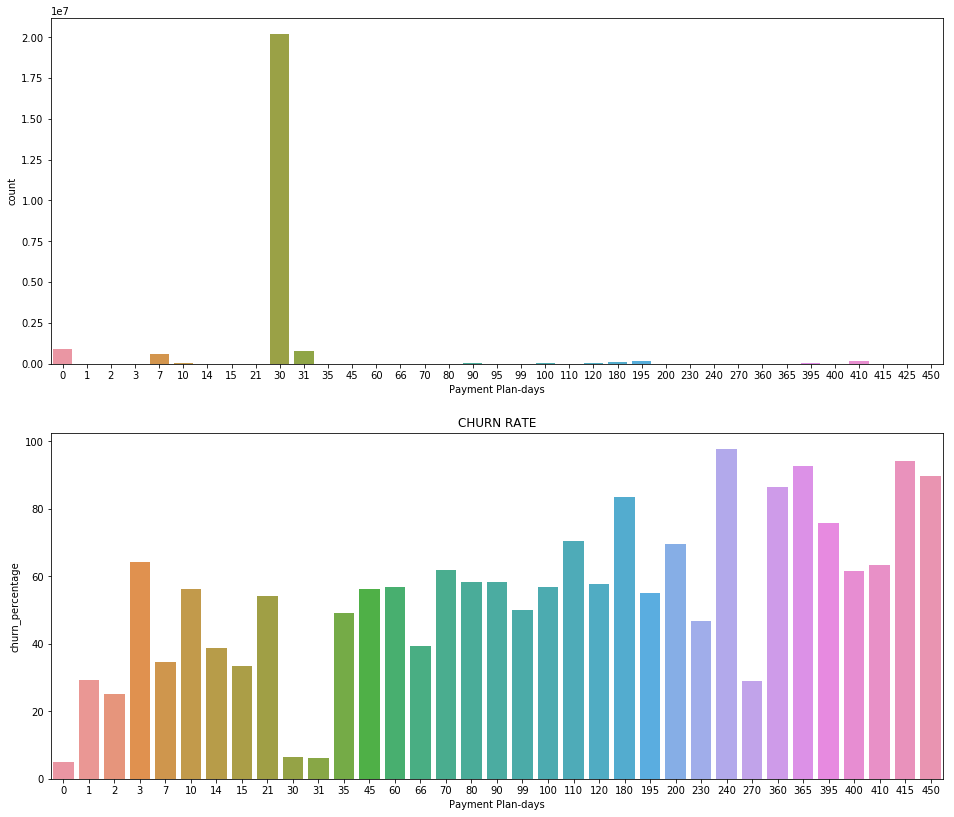

In [54]:
plt.figure(figsize=(16,14))
plt.subplot(211)
sns.countplot(x="payment_plan_days", data=transactions)
plt.xlabel('Payment Plan-days')
payment_plan_days_count = Counter(transactions['payment_plan_days']).most_common()
print("payment_plan_days Count: " +str(payment_plan_days_count))

plt.subplot(212)
df2 = x2.groupby(['payment_plan_days', 'is_churn'])['msno'].count().reset_index()
df2 = pd.pivot_table(df2, index = 'payment_plan_days', columns = 'is_churn', values = 'msno', aggfunc = np.sum)
df2['churn_percentage'] = (df2[1]/ (df2[0] + df2[1])) * 100
df2 = df2.reset_index()
sns.barplot(x = 'payment_plan_days', y = 'churn_percentage', data = df2)
plt.xlabel('Payment Plan-days')
plt.title('CHURN RATE')
plt.show()

The payment_plan_duration categories show strong differences in churn percentage. The lowest churn numbers(around 5%) are associated with the 30-days, 31-days, and the 0-day memberships(surprisingly). The churn percentage for next widely used plans 7-days is 35% & 410-days is 63%. For this feature as well, there are categories with low number statistics and large churn rate bars.

# Are the users paying according to their plan list price?

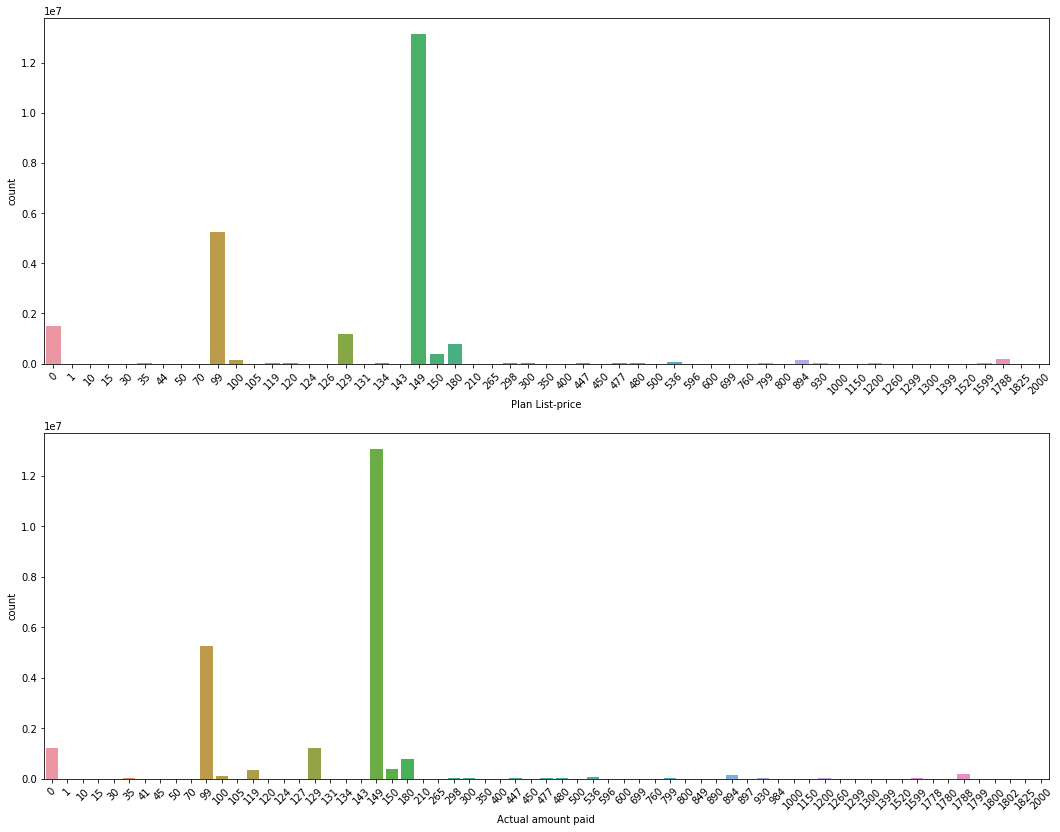

In [55]:
plt.figure(figsize=(18,14))
plt.subplot(211)
sns.countplot(x="plan_list_price", data=transactions)
plt.xlabel('Plan List-price')
plt.xticks(rotation = 45)
plt.subplot(212)
sns.countplot(x="actual_amount_paid", data=transactions)
plt.xlabel('Actual amount paid')
plt.xticks(rotation = 45)
plt.show()

The overall distributions of planned vs actual payment are very similar; even though differences are slightly visible e.g. for 119 NTD. Since both features have the same discrete payment values we can directly compare their frequency.

# Is the Actual amount paid = plan list price ? Let's see!!!

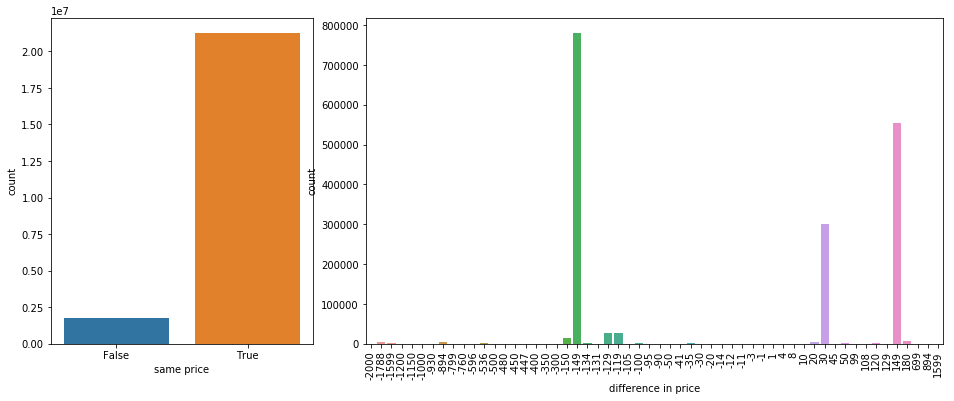

In [56]:
same_price = transactions['plan_list_price'] == transactions['actual_amount_paid']
diff_price = transactions['plan_list_price'] - transactions['actual_amount_paid'] 
diff_price = diff_price[diff_price !=0]

plt.figure(figsize=(16,6))
gridspec.GridSpec

plt.subplot2grid((3,3),(0,0), rowspan = 3)
sns.countplot(same_price)
plt.xlabel('same price')

plt.subplot2grid((3,3),(0,1), rowspan = 3, colspan = 2)
sns.countplot(diff_price)
plt.xlabel('difference in price')
plt.xticks(rotation = 'vertical')

plt.show()

Interestingly here, in most of the cases the users ended up paying more.

# Churn rate of users who paid more.

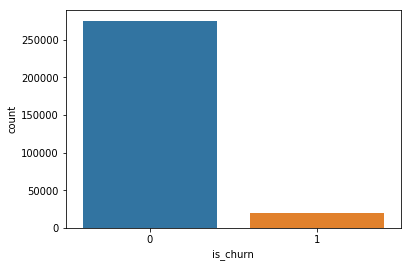

Churn Percentage: 6.869043106249323


In [57]:
paid_more = x2[x2['plan_list_price'] - x2['actual_amount_paid'] < 0]
paid_more = paid_more[['msno', 'is_churn']]
paid_more = paid_more.groupby('msno')['is_churn'].max().reset_index()
sns.countplot(x = 'is_churn', data = paid_more)
plt.show()
print('Churn Percentage: ' + str(20295/295456 * 100))

There isn't any surprising trend in churn rate of users who paid more.

#  Auto-renew Vs CHURN

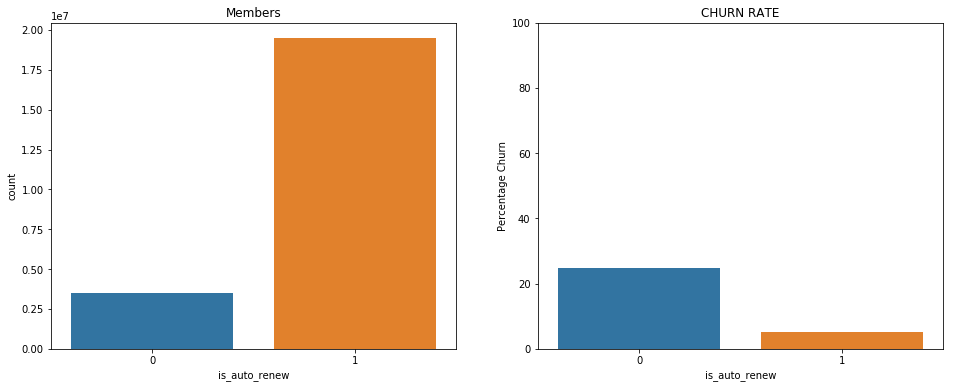

In [58]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x="is_auto_renew", data=transactions)
plt.title('Members')

plt.subplot(122)
df3 = x2.groupby(['is_auto_renew', 'is_churn'])['msno'].count().reset_index()
df3 = pd.pivot_table(df3, index = 'is_auto_renew', columns = 'is_churn', values = 'msno')
df3['churn_rate'] = (df3[1]/ (df3[0] + df3[1])) * 100
df3 = df3.reset_index()
sns.barplot(x = 'is_auto_renew', y = 'churn_rate', data = df3)
plt.ylabel('Percentage Churn')
plt.title('CHURN RATE')
plt.ylim(0,100)
plt.show()

The vast majority of users have automatic renewal of their subscriptions enabled and users who did not choose to auto_renew were clearly more likely to churn.

# Cancellation trend (transactions)

In [59]:
cancel_date = pd.DataFrame(transactions[transactions['is_cancel']==1][['is_cancel','transaction_date_year', 'transaction_date_month', 'transaction_date_date']])
cancel_date = pd.DataFrame(cancel_date.groupby(['transaction_date_year', 'transaction_date_month', 'transaction_date_date'])['is_cancel'].count()).reset_index()
cancel_date['DateTime'] = cancel_date[['transaction_date_year', 'transaction_date_month', 'transaction_date_date']].apply(lambda s : datetime.datetime(*s),axis = 1)

### Cancellations daily

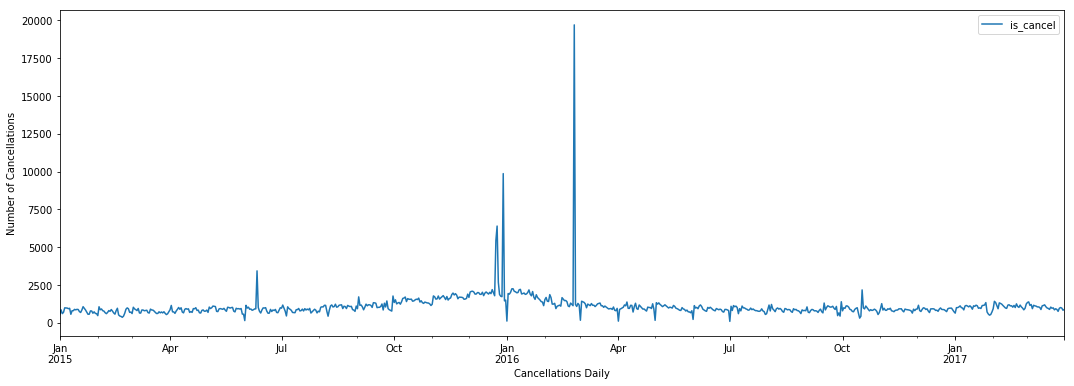

In [60]:
cancel_date.plot(x='DateTime', y='is_cancel', figsize = (18,6))
plt.xlabel('Cancellations Daily')
plt.ylabel('Number of Cancellations')
plt.show()

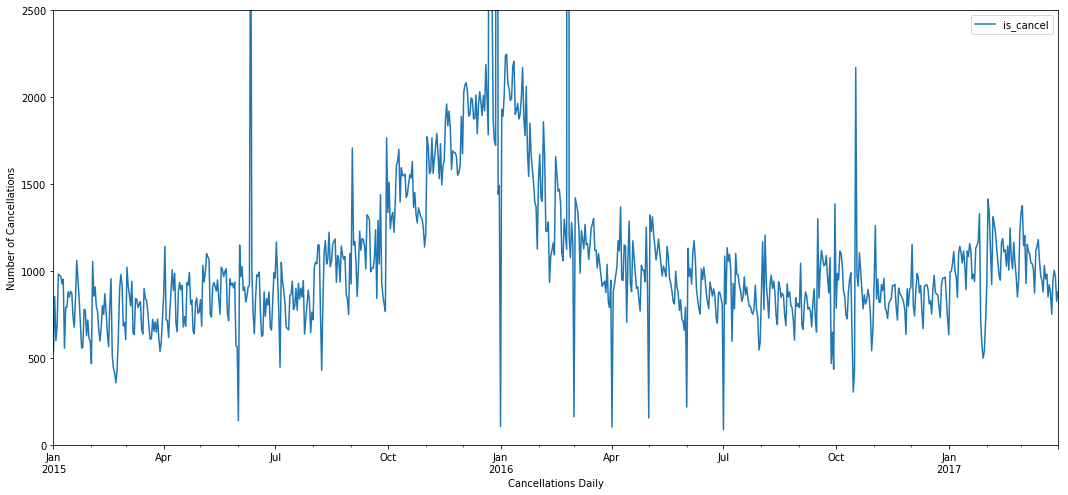

In [61]:
cancel_date.plot(x='DateTime', y='is_cancel', figsize = (18,8))
plt.xlabel('Cancellations Daily')
plt.ylabel('Number of Cancellations')
plt.ylim(0,2500)
plt.show()

The cancellation trend seems quite consistent overall with a couple of spikes in jan & mar 2016.

### Cancellations monthly

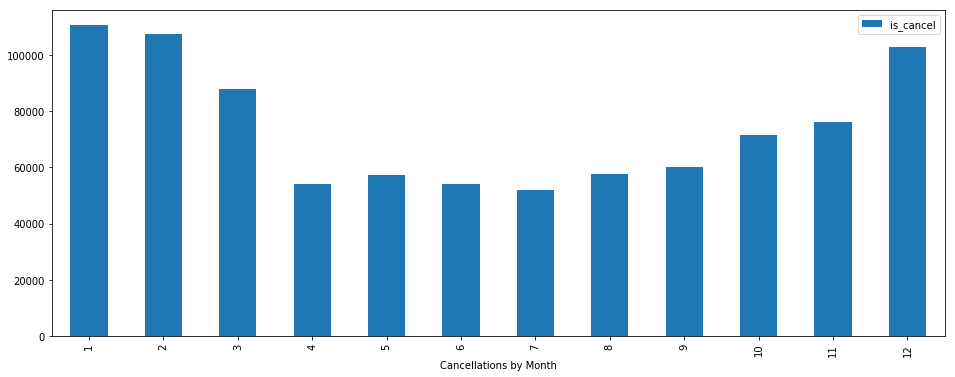

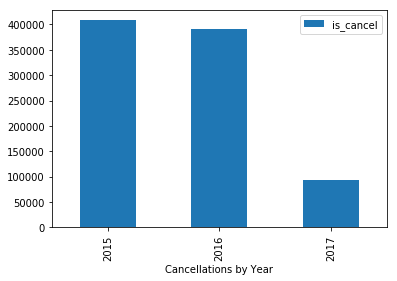

In [62]:
cancel_month = pd.DataFrame(transactions[transactions['is_cancel']==1][['is_cancel', 'transaction_date_month']])
cancel_month = pd.DataFrame(cancel_date.groupby(['transaction_date_month'])['is_cancel'].sum()).reset_index()
cancel_month.plot(x = 'transaction_date_month', y = 'is_cancel', kind = 'bar', figsize = (16,6))
plt.xlabel('Cancellations by Month')

cancel_year = pd.DataFrame(transactions[transactions['is_cancel']==1][['is_cancel', 'transaction_date_year']])
cancel_year = pd.DataFrame(cancel_date.groupby(['transaction_date_year'])['is_cancel'].sum()).reset_index()
cancel_year.plot(x = 'transaction_date_year', y = 'is_cancel', kind = 'bar')
plt.xlabel('Cancellations by Year')

plt.show()

Cancellations are high in the months of dec, jan, feb & mar. Rest all the months seem very similar.

# Do all the users who cancel their subscription churning??? (x2)

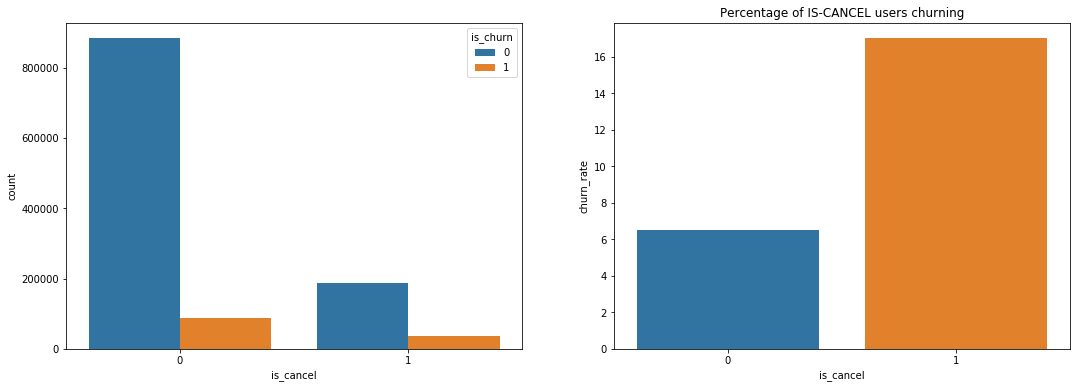

In [63]:
plt.figure(figsize = (18,6))
plt.subplot(121)
churn_cancel = pd.DataFrame(x2.groupby(['msno','is_cancel'])['is_churn'].max()).reset_index()
sns.countplot(x="is_cancel", hue = 'is_churn', data=churn_cancel)
           
plt.subplot(122)
cc = x2.groupby(['is_cancel','is_churn'])['msno'].count().reset_index()
cc = pd.pivot_table(cc, index = 'is_cancel', columns = 'is_churn', values = 'msno')
cc['churn_rate'] = (cc[1]/ (cc[0] + cc[1])) * 100
cc = cc.reset_index()
sns.barplot(x = 'is_cancel', y = 'churn_rate', data = cc)
plt.title('Percentage of IS-CANCEL users churning')
plt.show()

Not all users who cancelled their subscription are churning. Majority of the cancelled users are re-subscribing within a month

# Data Exploration in x3 (merged data set of train and userlogs)

In [64]:
x3 = pd.merge(train, user_logs, on = 'msno', how = 'left')

In [65]:
x3.head()

,msno,is_churn,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,date_year,date_month,date_date
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,7.0,0.0,3.0,5.0,71.0,68.0,17599.893,2017.0,3.0,5.0
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,138.0,19.0,7.0,1.0,21.0,158.0,8830.433,2017.0,3.0,1.0
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,0.0,0.0,0.0,0.0,34.0,17.0,7883.313,2017.0,3.0,19.0
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,15.0,0.0,0.0,1.0,38.0,17.0,9029.227,2017.0,3.0,16.0
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,0.0,0.0,0.0,0.0,8.0,8.0,1870.110,2017.0,3.0,10.0


# Life span of Churn users vs not churn users

In [66]:
f = {'total_secs':['sum'], 'is_churn':['min']}
a1 = x3[pd.isnull(x3['total_secs'])==False].groupby('msno').agg(f)
a1.columns = a1.columns.droplevel()
a1.columns = ['total_secs_sum', 'is_churn']
a1['total_hours'] = a1.total_secs_sum/3600
a1.head()

,total_secs_sum,is_churn,total_hours
msno,,,
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,192527.892,0,53.479970
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,115411.260,0,32.058683
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,149896.558,0,41.637933
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,116433.247,0,32.342569
++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,36636.638,0,10.176844


### Lifespan in hours Vs Churn-rate

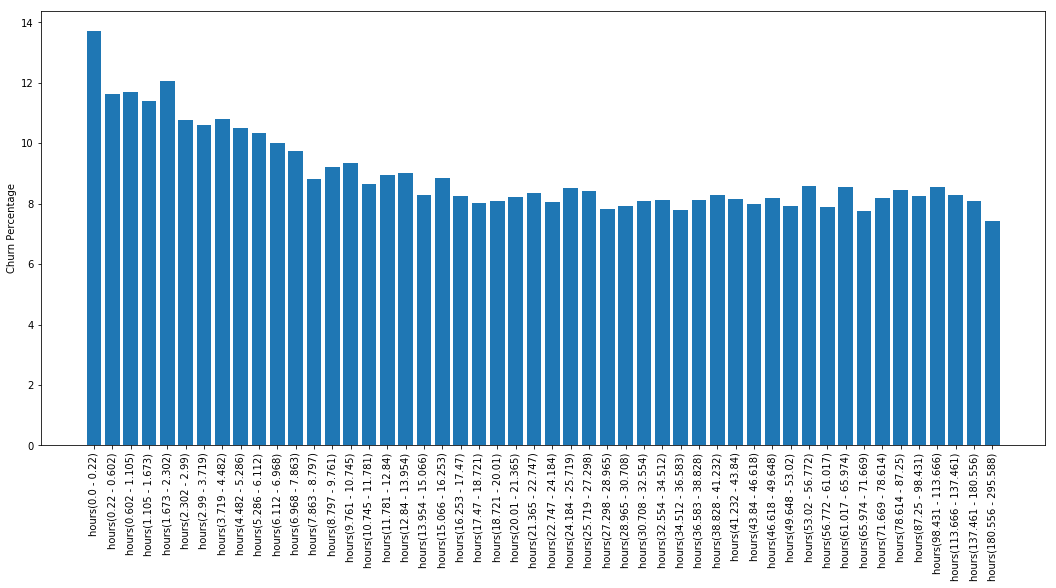

In [67]:
array_ = np.sort(a1['total_hours'])
start = 0
stop = len(array_)
step = 15000
bins = array_[start:stop:step]
def churn_percentage(mi,mx):
    hour = a1[(a1['total_hours'] > mi) & (a1['total_hours'] < mx)]
    hour_nc = len(hour[hour['is_churn'] == 0]) 
    hour_c = len(hour[hour['is_churn'] == 1])
    churn_percentage = (hour_c/ (hour_c + hour_nc)) * 100
    return churn_percentage

CP = []
bin_names = []
for i in range(0,len(bins)-1):
    CP.append(churn_percentage(bins[i],bins[i+1]))
    bin_names.append("hours(" + str(round(bins[i],3)) + " - " + str(round(bins[i+1],3)) + ")")
    i = i+1
    

plt.figure(figsize = (18,8))
plt.xticks(np.arange(0,len(bins)-1), bin_names, rotation = 90)
plt.ylabel('Churn Percentage')
plt.bar( np.arange(0,len(bins)-1) , CP)
plt.show()

### Lifespan in seconds Vs Churn-rate

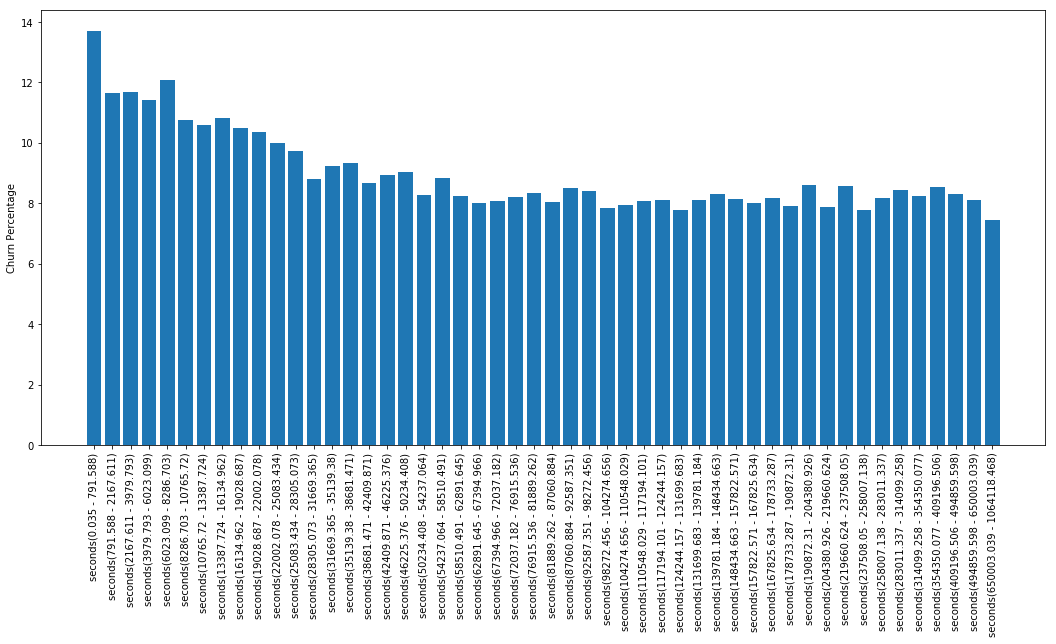

In [68]:
array_ = np.sort(a1['total_secs_sum'])
start = 0
stop = len(array_)
step = 15000
bins = array_[start:stop:step]
def churn_percentage(mi,mx):
    hour = a1[(a1['total_secs_sum'] > mi) & (a1['total_secs_sum'] < mx)]
    hour_nc = len(hour[hour['is_churn'] == 0]) 
    hour_c = len(hour[hour['is_churn'] == 1])
    churn_percentage = (hour_c/ (hour_c + hour_nc)) * 100
    return churn_percentage

CP = []
bin_names = []
for i in range(0,len(bins)-1):
    CP.append(churn_percentage(bins[i],bins[i+1]))
    bin_names.append("seconds(" + str(round(bins[i],3)) + " - " + str(round(bins[i+1],3)) + ")")
    i = i+1
    

plt.figure(figsize = (18,8))
plt.xticks(np.arange(0,len(bins)-1), bin_names, rotation = 90)
plt.ylabel('Churn Percentage')
plt.bar( np.arange(0,len(bins)-1) , CP)
plt.show()

Users with less life span are slightly churning more.

# Mean & Median of sum of all songs by CHURN-Users Vs Not CHURN-Users

In [69]:
f = {'is_churn':['max'],'num_25':['sum'],
    'num_50':['sum'],'num_75':['sum'],'num_985':['sum'],'num_100':['sum'],'num_unq':['sum']}
all_mean = x3.groupby('msno').agg(f)
all_mean.columns = all_mean.columns.droplevel()
all_mean.columns = ['is_churn','num_25_sum','num_50_sum',
                   'num_75_sum','num_985_sum','num_100_sum','num_unq_sum']
all_mean.head()

,is_churn,num_25_sum,num_50_sum,num_75_sum,num_985_sum,num_100_sum,num_unq_sum
msno,,,,,,,
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,191.0,90.0,75.0,144.0,589.0,885.0
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0,43.0,12.0,15.0,12.0,485.0,468.0
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0,207.0,163.0,100.0,64.0,436.0,828.0
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0,105.0,24.0,39.0,35.0,479.0,230.0
++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0,74.0,18.0,10.0,1.0,130.0,223.0


In [70]:
churn_users = all_mean[all_mean['is_churn'] == 0]
not_churn_users = all_mean[all_mean['is_churn'] == 1]
churn_users = churn_users.drop(['is_churn'], 1)
not_churn_users = not_churn_users.drop(['is_churn'], 1)

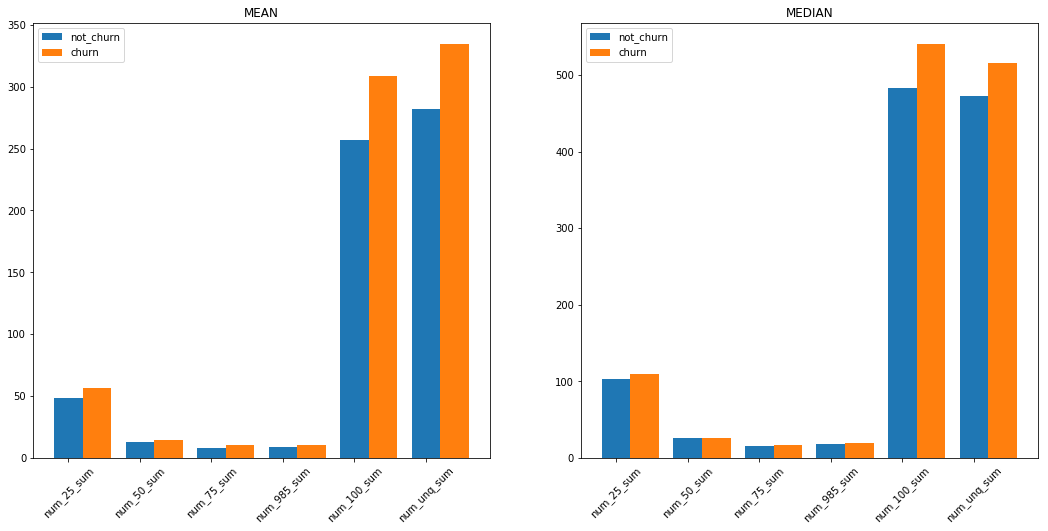

In [71]:
plt.figure(figsize=(18,8))
plt.subplot(121)
width = 0.4
plt.bar( np.arange(0,6) , not_churn_users.median(), width=width, label = 'not_churn')
plt.bar( np.arange(0,6)+width , churn_users.median() , width, label = 'churn')
plt.xticks(np.arange(6), list(churn_users), rotation = '45')
plt.legend(loc = 'upper left')
plt.title('MEAN')

plt.subplot(122)
width = 0.4
plt.bar( np.arange(0,6) , not_churn_users.mean(), width=width, label = 'not_churn')
plt.bar( np.arange(0,6)+width , churn_users.mean() , width, label = 'churn')
plt.xticks(np.arange(6), list(churn_users), rotation = '45')
plt.legend(loc = 'upper left')
plt.title('MEDIAN')
plt.show()

# Number of complete songs against incomplete songs

In [72]:
x3['incomplete_songs'] = x3['num_25'] + x3['num_50'] + x3['num_75'] + x3['num_985']
comp_incomp = x3[['is_churn', 'incomplete_songs', 'num_100']]
comp_incomp_mean = comp_incomp.groupby('is_churn')[['incomplete_songs', 'num_100']].mean().reset_index()
comp_incomp_median = comp_incomp.groupby('is_churn')[['incomplete_songs', 'num_100']].median().reset_index()

### Mean & Median of complete songs Vs incomplete sonngs for churn vs not churn users.

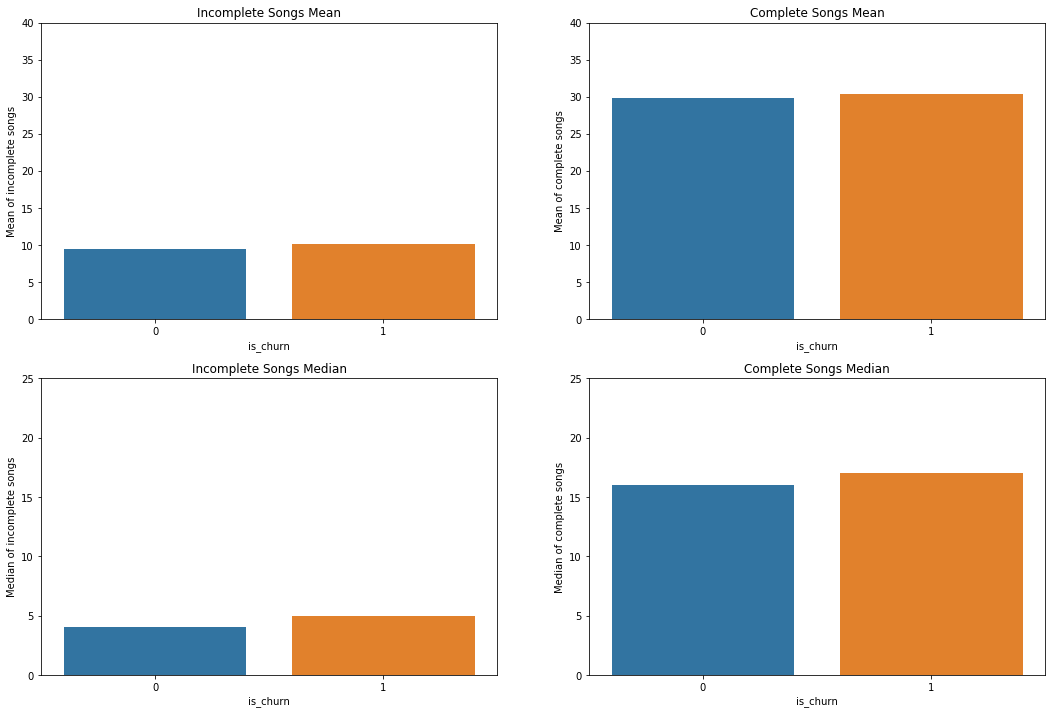

In [73]:
plt.figure(figsize = (18,12))

plt.subplot(221)
sns.barplot(x = 'is_churn',  y = 'incomplete_songs', data = comp_incomp_mean)
plt.ylabel('Mean of incomplete songs')
plt.title('Incomplete Songs Mean')
plt.ylim(0,40)

plt.subplot(222)
sns.barplot(x = 'is_churn',  y = 'num_100', data = comp_incomp_mean)
plt.ylabel('Mean of complete songs')
plt.title('Complete Songs Mean')
plt.ylim(0,40)

plt.subplot(223)
sns.barplot(x = 'is_churn',  y = 'incomplete_songs', data = comp_incomp_median)
plt.ylabel('Median of incomplete songs')
plt.title('Incomplete Songs Median')
plt.ylim(0,25)

plt.subplot(224)
sns.barplot(x = 'is_churn',  y = 'num_100', data = comp_incomp_median)
plt.ylabel('Median of complete songs')
plt.title('Complete Songs Median')
plt.ylim(0,25)

plt.show()

It seems like both the churn users and not churn users are playing same number of songs completely.

# Number of times user has logged on

In [74]:
log_in = pd.DataFrame(x3.groupby(['msno', 'is_churn'])['msno'].size()).reset_index(drop = True)
f = {'is_churn':['min'],'msno':['count']}
log_in = x3.groupby('msno').agg(f)
log_in.columns = log_in.columns.droplevel()
log_in.columns = ['is_churn','times_user_has_logged_on']
log_in_churn = log_in[log_in.is_churn == 1]
log_in_not_churn = log_in[log_in.is_churn == 0]

In [75]:
log_in_churn_percentage = pd.DataFrame(log_in_churn.groupby('times_user_has_logged_on')['times_user_has_logged_on'].count())
log_in_churn_percentage['login_percentage'] = (log_in_churn_percentage['times_user_has_logged_on']/ 87330) * 100

log_in_not_churn_percentage = pd.DataFrame(log_in_not_churn.groupby('times_user_has_logged_on')['times_user_has_logged_on'].count())
log_in_not_churn_percentage['login_percentage'] = (log_in_not_churn_percentage['times_user_has_logged_on']/ 883630) * 100

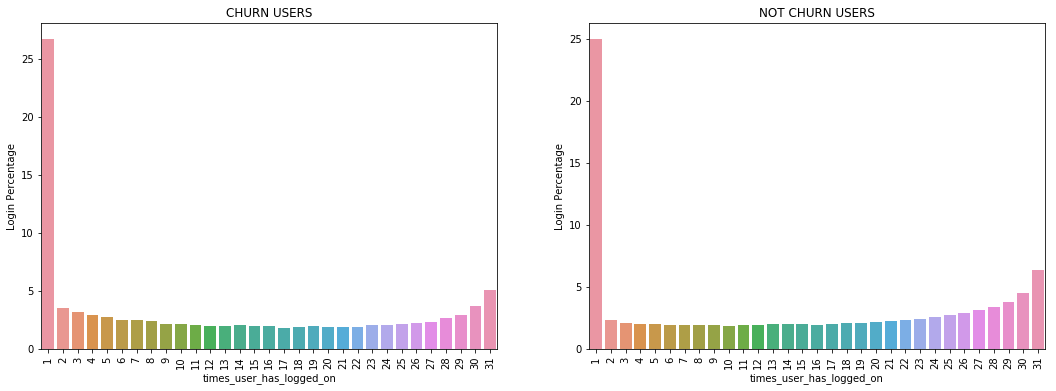

In [76]:
plt.figure(figsize = (18,6))
plt.subplot(121)
sns.barplot(x = log_in_churn_percentage.index, y = 'login_percentage', data = log_in_churn_percentage)
plt.xticks(rotation = '90')
plt.ylabel('Login Percentage')
plt.title('CHURN USERS')

plt.subplot(122)
sns.barplot(x = log_in_not_churn_percentage.index, y = 'login_percentage', data = log_in_not_churn_percentage)
plt.xticks(rotation = '90')
plt.ylabel('Login Percentage')
plt.title('NOT CHURN USERS')
plt.show()

Here we observe both the churn users & not churn users log-in's are very similar.